In [57]:
import numpy as np

In [58]:
test = '''
        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.

10R5L5R10L4R5L5'''

vals = []
for line in test.split('\n')[1:]:
    vals.append(line)
    
fakecommands = vals[-1]
fakescape = vals[:-2]


max_l = -1
for fake in fakescape:
    if len(fake)>max_l:
        max_l=len(fake)    
vals[:5]

['        ...#',
 '        .#..',
 '        #...',
 '        ....',
 '...#.......#']

In [59]:
vals = []
with open('./input.txt', 'r') as file:
    for line in file:
        vals.append(line)
        
fakecommands = vals[-1]
fakescape = vals[:-2]


max_l = -1
for fake in fakescape:
    if len(fake)>max_l:
        max_l=len(fake[:-1])
        #vals[-2:]

In [60]:

landscape=[]

for fake in fakescape:
    temp = []
    for f in fake:
        if f==' ':
            temp.append(-1)
        elif f=='.':
            temp.append(0)
        elif f=='#':
            temp.append(1)
        else:
            continue
    while len(temp)<max_l:
        temp.append(-1)
    landscape.append(temp)
landscape=np.array(landscape)
landscape.shape

(200, 150)

In [61]:
commands = []
start = -1
for idx, c in enumerate(fakecommands):
    if c.isnumeric():
        continue
    else:
        if start == -1:
            commands.append(int(fakecommands[:idx]))
        else:
            commands.append(int(fakecommands[start:idx]))
        commands.append(fakecommands[idx])
        start = idx+1
if start < len(fakecommands):
    commands.append(int(fakecommands[start:]))

In [62]:
placement = []
current = [0, np.argwhere(landscape[0]==0).min()]
direction = 'r'

for c in commands:    
    assert landscape[current[0],current[1]]==0
    
    if c == 'R':
        if direction == 'r':
            direction = 'd'
        elif direction == 'd':
            direction = 'l'
        elif direction == 'l':
            direction = 'u'
        elif direction == 'u':
            direction = 'r'
        else:
            assert 3==2
    elif c == 'L':
        if direction == 'r':
            direction = 'u'
        elif direction == 'u':
            direction = 'l'
        elif direction == 'l':
            direction = 'd'
        elif direction == 'd':
            direction = 'r'
        else:
            assert 3==2    
    elif str(c).isnumeric():
        if direction == 'r':
            move = [0, 1]
        elif direction == 'l':
            move = [0,-1]
        elif direction == 'u':
            move = [-1,0]
        elif direction == 'd':
            move = [ 1,0]
        else:
            assert 3==2

        for counter in range(c):
            placement.append([current[0],current[1]])
            trying = [current[0] + move[0], current[1] + move[1]]
            
            if trying[0] == -1:
                trying[0] = landscape.shape[0]-1
            elif trying[0] == landscape.shape[0]:
                trying[0] = 0                
                
            if trying[1] == -1:                    
                trying[1] = landscape.shape[1]-1
            elif trying[1] == landscape.shape[1]:
                trying[1] = 0  

            
            if landscape[trying[0],trying[1]]   ==  0:
                current[0] = trying[0]
                current[1] = trying[1]
                                     
            elif landscape[trying[0],trying[1]] ==  1:
                break
                
            elif landscape[trying[0],trying[1]] == -1:
                if direction == 'r':
                    proposed = np.argwhere(landscape[current[0],:] != -1).min()
                    if landscape[current[0],proposed] != 0:
                        break
                    elif landscape[current[0],proposed]==0:
                        current[1] = proposed
                  
                elif direction == 'l':
                    proposed = np.argwhere(landscape[current[0],:] != -1).max()
                    if landscape[current[0],proposed] != 0:
                        break
                    elif landscape[current[0],proposed]==0:                        
                        current[1] = proposed
                     
                elif direction == 'u':
                    proposed = np.argwhere(landscape[:,current[1]] != -1).max()
                    if landscape[proposed,current[1]] != 0:
                        break
                    elif landscape[proposed,current[1]]==0:
                        current[0] = proposed

                elif direction == 'd':                 
                    proposed = np.argwhere(landscape[:,current[1]] != -1).min()
                    if landscape[proposed,current[1]] != 0:
                        break
                    elif landscape[proposed,current[1]]==0:
                        current[0] = proposed    
                else:
                    assert 3==2
                     
            else:
                assert 3==2
    else:
        assert 3==2

if direction=='r':
    ones = 0
elif direction =='d':
    ones = 1
elif direction == 'l':
    ones = 2
elif direction == 'u':
    ones = 3
else:
    assert 3==2
1000*(current[0]+1)+4*(current[1]+1)+ones

144244

Text(0.5, 1.0, 'Question 1')

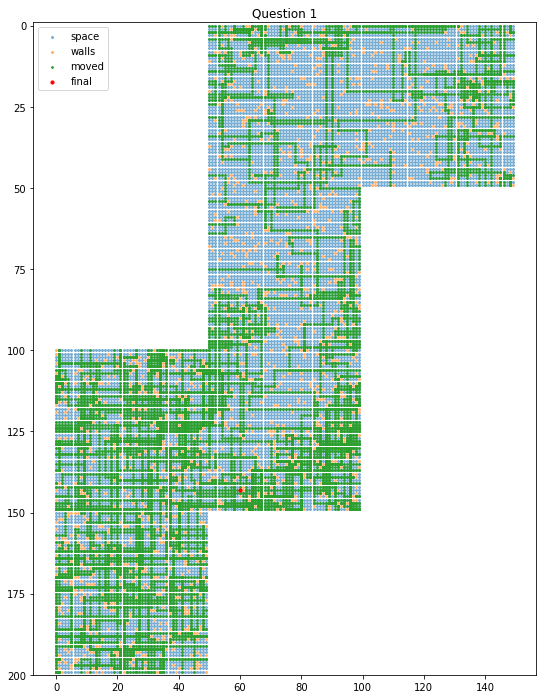

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,12))
y,x = np.argwhere(landscape==0).T
plt.scatter(x=x,y=y,s=4, label = 'space', alpha=0.5)
y,x = np.argwhere(landscape==1).T
plt.scatter(x=x,y=y,s=4, label='walls', alpha=0.5)

y,x = np.array(placement).T
plt.scatter(x=x,y=y,s=3,label='moved')#, alpha = 0.5)
plt.scatter(x=x[-1],y=y[-1],s=10,c='r', label='final')
plt.ylim(landscape.shape[0],-1)
plt.legend()
plt.title('Question 1')

In [67]:
lscape = landscape[::-1]

In [68]:
s1 = {
    'ymin': 0,
    'ymax': 49,
    'xmin': 0,
    'xmax': 49,
    'n': [2,'u'],
    'e': [3,'u'],
    's': [6,'d'],
    'w': [5,'d']
}
s2 = {   
    'ymin': 50,
    'ymax': 99,
    'xmin': 0,
    'xmax': 49,
    'n': [4,'r'],
    'e': [3,'r'],
    's': [1,'d'],
    'w': [5,'r']
}

s3 = {   
    'ymin': 50,
    'ymax': 99,
    'xmin': 50,
    'xmax': 99,
    'n': [4,'u'],
    'e': [6,'l'],
    's': [1,'l'],
    'w': [2,'l']
}
s4 = {   
    'ymin': 100,
    'ymax': 149,
    'xmin': 50,
    'xmax': 99,
    'n': [5,'u'],
    'e': [6,'u'],
    's': [3,'d'],
    'w': [2,'d']
}
s5 = {
    'ymin': 150,
    'ymax': 199,
    'xmin': 50,
    'xmax': 99,
    'n': [1,'r'],
    'e': [6,'r'],
    's': [4,'d'],
    'w': [2,'r']
}
s6 = {    
    'ymin': 150,
    'ymax': 199,
    'xmin': 100,
    'xmax': 149,
    'n': [1,'u'],
    'e': [3,'l'],
    's': [4,'l'],
    'w': [5,'l']
}
sides = [s1,s2,s3,s4,s5,s6]

import pandas as pd
df = pd.DataFrame(sides, index=[1,2,3,4,5,6])
df

,ymin,ymax,xmin,xmax,n,e,s,w
1,0,49,0,49,"[2, u]","[3, u]","[6, d]","[5, d]"
2,50,99,0,49,"[4, r]","[3, r]","[1, d]","[5, r]"
3,50,99,50,99,"[4, u]","[6, l]","[1, l]","[2, l]"
4,100,149,50,99,"[5, u]","[6, u]","[3, d]","[2, d]"
5,150,199,50,99,"[1, r]","[6, r]","[4, d]","[2, r]"
6,150,199,100,149,"[1, u]","[3, l]","[4, l]","[5, l]"


In [69]:
def get_square(yx):
    assert yx[1]>=0 and yx[0]>=0 and yx[0]<lscape.shape[0] and yx[1]<lscape.shape[1]
    square = (yx[0] >= df['ymin']) & (yx[0] <= df['ymax']) & \
             (yx[1] >= df['xmin']) & (yx[1] <= df['xmax'])

    temp = df[square]
    assert len(temp)==1
    current_square = df[square].index[0] 
    return current_square

In [70]:
placement = []
current = [lscape.shape[0]-1, np.argwhere(lscape[-1]==0).min()]
direction = 'r'
old_square = 5
counters = 0
for num, c in enumerate(commands):    
    assert lscape[current[0],current[1]]==0

    if c == 'R':
        if direction == 'r':
            direction = 'd'
        elif direction == 'd':
            direction = 'l'
        elif direction == 'l':
            direction = 'u'
        elif direction == 'u':
            direction = 'r'
        else:
            assert 3==2
    elif c == 'L':
        if direction == 'r':
            direction = 'u'
        elif direction == 'u':
            direction = 'l'
        elif direction == 'l':
            direction = 'd'
        elif direction == 'd':
            direction = 'r'
        else:
            assert 3==2    
    elif str(c).isnumeric():        
        for counter in range(c):
            if direction == 'r':
                move = [0, 1]
            elif direction == 'l':
                move = [0,-1]
            elif direction == 'u': # flipped for lscape
                move = [ 1,0]
            elif direction == 'd':
                move = [-1,0]
            else:
                assert 3==2            
            
            placement.append([current[0],current[1]])
            #current_square = get_square(current)
            trying = [current[0] + move[0], current[1] + move[1]]            
            new_dir = direction
            #print(trying, direction)
            if trying[0] < 0:
                assert new_dir == 'd'
                assert get_square([trying[0]+1,trying[1]]) == 1
                trying[0],trying[1] = df.loc[6,'ymax'], df.loc[6,'xmin']+trying[1]
                new_dir=df.loc[1,'s'][1] #'d'
                
            if trying[0] >= lscape.shape[0]:
                assert new_dir == 'u'
                assert get_square([trying[0]-1,trying[1]]) in [5,6]
                if get_square([trying[0]-1,trying[1]]) == 5:
                    trying[0],trying[1] = df.loc[1,'ymax']-trying[1]+df.loc[5,'xmin'], df.loc[1,'xmin']                    
                    new_dir = df.loc[5,'n'][1]#'r'                    
                    assert get_square(trying)==1
                elif get_square([trying[0]-1,trying[1]]) == 6:
                    trying[0],trying[1] = df.loc[1,'ymin'], trying[1] - df.loc[6,'xmin']
                    new_dir = df.loc[6,'n'][1]#'u'                       
                    assert get_square(trying)==1
                
            if trying[1] < 0:
                assert new_dir == 'l'  
                assert get_square([trying[0],trying[1]+1]) in [1,2]              
                if get_square([trying[0],trying[1]+1]) == 1:
                    trying[0],trying[1] = df.loc[5,'ymax'], df.loc[5,'xmax'] - trying[0]
                    new_dir = df.loc[1,'w'][1]#'d'                    
                    assert get_square(trying)==5               
                elif get_square([trying[0],trying[1]+1]) == 2:
                    trying[0],trying[1] = df.loc[5,'ymax']-trying[0]+df.loc[2,'ymin'], df.loc[5,'xmin']
                    new_dir = df.loc[2,'w'][1]#'r'                      
                    assert get_square(trying)==5                 
                
            if trying[1] >= lscape.shape[1]:
                assert new_dir == 'r'
                assert get_square([trying[0],trying[1]-1]) == 6

                trying[0],trying[1] = df.loc[3,'ymax']-trying[0]+df.loc[6,'ymin'],df.loc[3,'xmax']
                new_dir = df.loc[6,'e'][1]#'l'     
                assert get_square(trying)==3              
                
            if lscape[trying[0],trying[1]] == -1:  

                if new_dir == 'l':
                    if get_square([trying[0],trying[1]+1]) in [1,2,3,6]:
                        assert 3==2
                                   
                    elif get_square([trying[0],trying[1]+1]) == 5:
                        trying[0],trying[1] = df.loc[2,'ymax']-trying[0]+df.loc[5,'ymin'], df.loc[2,'xmin']
                        new_dir = df.loc[5,'w'][1]#'r'
                        assert get_square(trying)==2                       
                    elif get_square([trying[0],trying[1]+1]) == 4:                 
                        trying[0],trying[1] = df.loc[2,'ymax'], df.loc[2,'xmax']-trying[0]+df.loc[4,'ymin']
                        new_dir = df.loc[4,'w'][1]#'d'
                        assert get_square(trying)==2                        
                    else:
                        assert 3==2
                elif new_dir == 'r':
                    if get_square([trying[0],trying[1]-1]) in [2,5,6]:
                        assert 3==2
                    elif get_square([trying[0],trying[1]-1]) == 1:
                        trying[0],trying[1] = df.loc[3,'ymin'], df.loc[3,'xmin']-trying[0]+df.loc[1,'ymax']
                        new_dir = df.loc[1,'e'][1]#'u'
                        assert get_square(trying)==3                     
                    elif get_square([trying[0],trying[1]-1]) == 3:
                        trying[0],trying[1] = df.loc[6,'ymax']-trying[0]+df.loc[3,'ymin'],df.loc[6,'xmax']
                        new_dir = df.loc[3,'e'][1]#'l'
                        assert get_square(trying)==6                        
                    elif get_square([trying[0],trying[1]-1]) == 4:
                        trying[0],trying[1] = df.loc[6,'ymin'], df.loc[6,'xmin']-trying[0]+df.loc[4,'ymax']
                        new_dir = df.loc[4,'e'][1]#'u'
                        assert get_square(trying)==6                   
                    else:
                        assert 3==2
                elif new_dir == 'u':
                    if get_square([trying[0]-1,trying[1]]) in [1,3,4,5,6]:
                        assert 3==2
                    elif get_square([trying[0]-1,trying[1]]) == 2:
                        trying[0],trying[1] = df.loc[4,'ymax']-trying[1]+df.loc[2,'xmin'], df.loc[4,'xmin']
                        new_dir = df.loc[2,'n'][1]#'r'              
                        assert get_square(trying)==4                     
                    else:
                        assert 3==2
                elif new_dir == 'd':
                    if get_square([trying[0]+1,trying[1]]) in [1,2,4,5]:
                        assert 3==2                                            
                    elif get_square([trying[0]+1,trying[1]]) == 3:
                        trying[0],trying[1] = df.loc[1,'ymax']-trying[1]+df.loc[3,'xmin'],df.loc[1,'xmax']
                        new_dir = df.loc[3,'s'][1]#'l'
                        assert get_square(trying)==1                        
                    elif get_square([trying[0]+1,trying[1]]) == 6:
                        trying[0],trying[1] = df.loc[4,'ymax']-trying[1]+df.loc[6,'xmin'], df.loc[4,'xmax']
                        new_dir = df.loc[6,'s'][1]#'l'          
                        assert get_square(trying)==4                        
                    else:
                        assert 3==2

            if lscape[trying[0],trying[1]] == 1:
                new_square = get_square(trying)
                break
            elif lscape[trying[0],trying[1]] == 0:                
                current[0] = trying[0]
                current[1] = trying[1]
                new_square = get_square(trying)     
                direction = new_dir
            else:
                assert 3==2
                
            if old_square == 1:
                assert new_square in [1,2,3,6,5]
                old_square = new_square
            elif old_square == 2:
                assert new_square in [1,4,3,2,5]
                old_square = new_square
            elif old_square == 3:
                assert new_square in [3,4,6,1,2]
                old_square = new_square                
            elif old_square == 4:
                assert new_square in [4,5,6,3,2]
                old_square = new_square                
            elif old_square == 5:
                assert new_square in [1,2,4,5,6]
                old_square = new_square
            elif old_square == 6:
                assert new_square in [6,1,3,4,5]
                old_square = new_square
            else:
                assert 3==2
    else:
        assert 3==2

if direction == 'r':
    ones = 0
elif direction =='d':
    ones = 1
elif direction == 'l':
    ones = 2
elif direction == 'u':
    ones = 3
else:
    assert 3==2
1000*(200-current[0])+4*(current[1]+1)+ones

138131

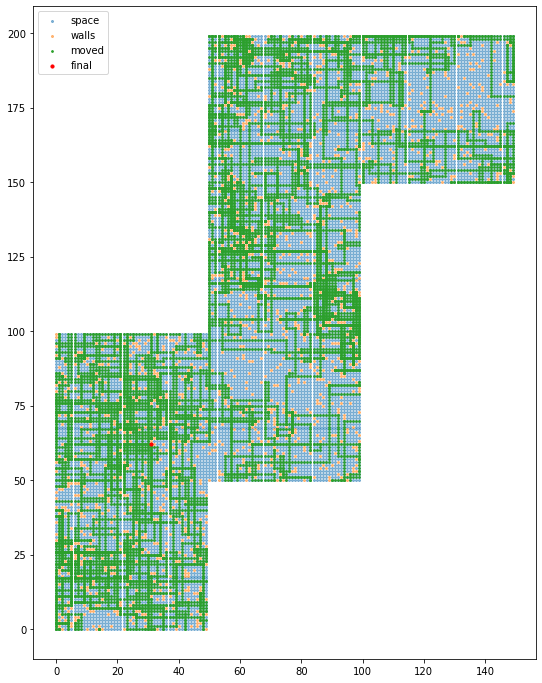

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,12))
y,x = np.argwhere(lscape==0).T
plt.scatter(x=x,y=y,s=4, label = 'space', alpha=0.5)
y,x = np.argwhere(lscape==1).T
plt.scatter(x=x,y=y,s=4, label='walls', alpha=0.5)

y,x = np.array(placement).T
plt.scatter(x=x,y=y,s=3,label='moved')#, alpha = 0.5)
plt.scatter(x=x[-1],y=y[-1],s=10,c='r', label='final')
plt.legend()